<a href="https://colab.research.google.com/github/dyjdlopez/AIDA/blob/main/AIDA_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Preparation
In data preparation there are several activities that we need to perform, namely: Data Cleaning and Data Transformation. We will discuss the concepts of these activities and how do we do them using Pandas. 

In [ ]:
naia_17_jan=pd.read_csv("naia-17-1.csv")
naia_17_feb=pd.read_csv("naia-17-2.csv")

In [ ]:
## Clean and consolidate the NAIA weather dataset
## Drop row 0
## Combine the datasets n-1 and n

## Data Cleaning
Data cleaning is the process of fixing or erroneous, corrupted, misformatted, duplicate, or incomplete data within a dataset.

In [ ]:
## Backups
naia_1701_df = naia_17_jan.copy()

In [ ]:
naia_1701_df = naia_1701_df.drop(index=0, axis=1) #New Transformation


In [ ]:
naia_1701_df['RAINFALL'][naia_1701_df['RAINFALL'] == 'T'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
naia_1701_df = naia_1701_df.astype(float)
naia_1701_df.dtypes

MONTH             float64
DAY               float64
RAINFALL          float64
TMAX              float64
TMIN              float64
TMEAN             float64
WIND SPEED        float64
WIND DIRECTION    float64
dtype: object

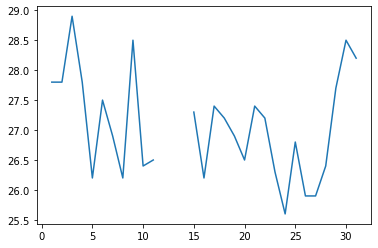

In [ ]:
## Drop NA
naia_1701_df['TMEAN'].plot()

In [ ]:
## Fill
"""
For RAINFALL : T= average of column
For TMEAN : NaN = interpolated values
"""
# naia_1701_df['RAINFALL'].mean()
naia_rain = naia_1701_df['RAINFALL']
naia_rain = naia_rain.fillna(naia_1701_df['RAINFALL'].mean())
naia_1701_df['RAINFALL'] = naia_rain


In [ ]:
naia_tmean = naia_1701_df['TMEAN']
naia_tmean = naia_tmean.interpolate()

naia_1701_df['TMEAN'] = naia_tmean
naia_1701_df

In [ ]:
def c_to_k(C): return C+273.15
K = lambda C : C+273.15
K(32)

305.15

In [ ]:
naia_temps = naia_1701_df[['TMIN','TMAX','TMEAN']]
naia_1701_df[['TMIN','TMAX','TMEAN']] = K(naia_temps)
naia_1701_df

In [ ]:
def naia_clean(df): 

  ## RAINFALL --> Replace T with NaN
  df['RAINFALL'][df['RAINFALL'] == 'T'] = np.nan

  ## Convert to float
  df = df.astype(float)

  ## RAINFALL --> NaN as mean vals
  rain = df['RAINFALL']
  rain = rain.fillna(df['RAINFALL'].mean())
  df['RAINFALL'] = rain

  ## TMEAN --> NaN as interp vals
  tmean = df['TMEAN']
  df['TMEAN'] = tmean.interpolate()

  ## TMIN, TMAX, TMEAN --> convert to K
  temps = df[['TMIN','TMAX','TMEAN']]
  df[['TMIN','TMAX','TMEAN']] = K(temps)
  return df

In [ ]:
naia_df = pd.DataFrame()
for i in range(1,4):
  df_temp = pd.read_csv(f'naia-17-{i}.csv')
  df_temp = df_temp.drop(index=0, axis=1)
  naia_df = pd.concat([naia_df,df_temp], ignore_index=True)
naia_df_clean = naia_clean(naia_df)
naia_df_clean['TMEAN'].plot()

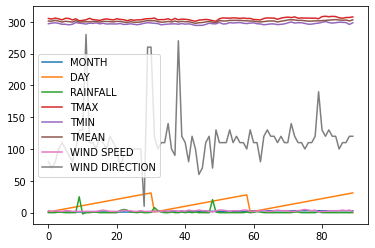

In [ ]:
naia_df_clean.plot()

## Data Transformation
Data transformation is the partial or complete conversion of the dataset into a prescribed format or scale. We can use several techniques such as simple conversion, standardization, or normalization.

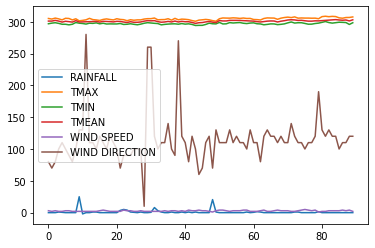

In [ ]:
X = naia_df_clean.drop(labels=['MONTH','DAY'],axis=1)
X.plot()

### Normalization 
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

$$X' = \frac{X-X_{min}}{X_{max} - X_{min}}$$

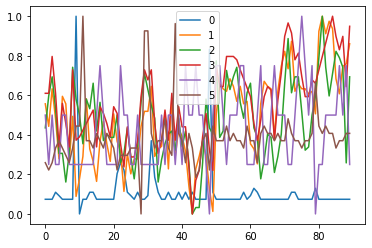

In [ ]:
from sklearn.preprocessing import MinMaxScaler
## Set the scaler by fitting the dataset
norm_scaler = MinMaxScaler()
norm = norm_scaler.fit(X)
## Transform the target dataset
X_norm = norm.transform(X)
pd.DataFrame(X_norm).plot()

### Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

$$\frac{X-\mu}{\sigma}$$

In [ ]:
sns.distplot(X)
X.plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
## Set the scaler by fitting the dataset
std_scaler = StandardScaler()
standard = std_scaler.fit(X)
## Transform the target dataset
X_standard = standard.transform(X)

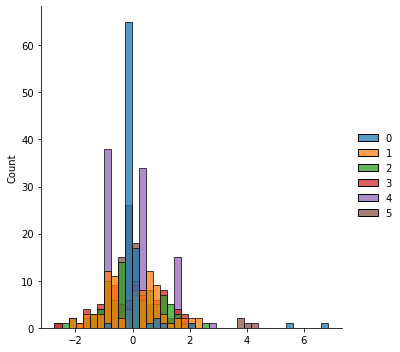

In [ ]:
sns.displot(X_standard)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


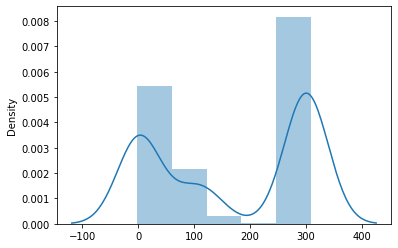

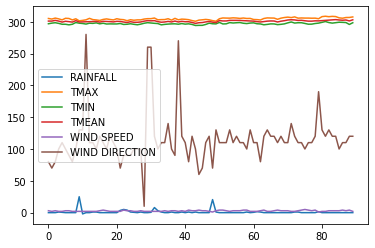

In [ ]:
sns.distplot(X)
X.plot()

## Data Visualization

### Ranking

In [ ]:
donut_sales_df = pd.read_csv('bebang sales.csv')
class_df = pd.read_csv('class-da.csv')
pokemon_df = pd.read_csv('pokemon.csv')

In [ ]:
donut_sales_df

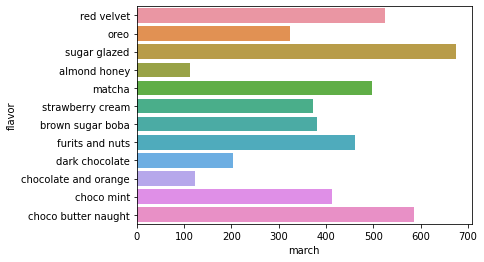

In [ ]:
#Bebang's Donuts (Bar plots)
sns.barplot(data=donut_sales_df, x='march', y='flavor') 
# donut_sales_df.iloc[9]

### Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


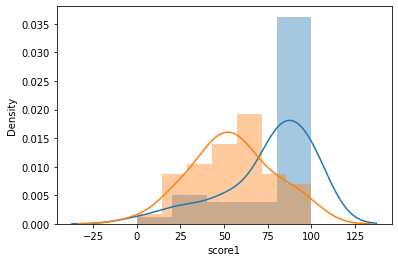

In [ ]:
sns.distplot(class_df['score2'])
sns.distplot(class_df['score1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


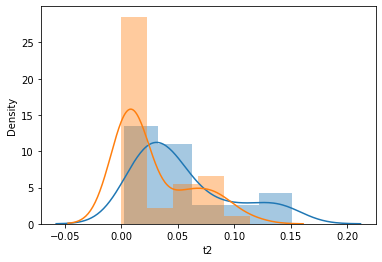

In [ ]:
### Answering Time (Histograms)
sns.distplot(class_df['t1'])
sns.distplot(class_df['t2'])

In [ ]:
class_df.columns

Index(['sw', 'hw', 'q1', 'takes', 't_open', 't_pass1', 't1', 'score1',
       't_pass2', 't2', 'ttime', 'score2', 'fscore'],
      dtype='object')

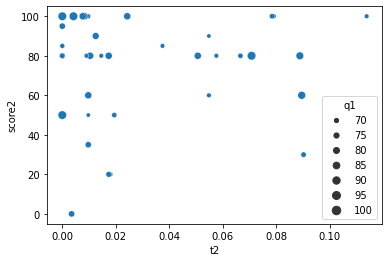

In [ ]:
### Class Data (Scatter)
sns.scatterplot(x='t2', y='score2', size='q1',data=class_df)

In [ ]:
naia_df

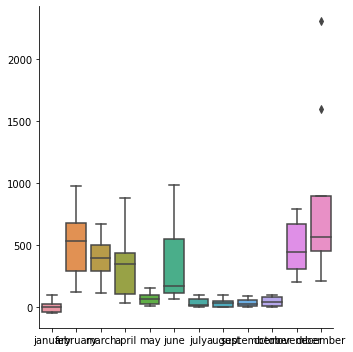

In [ ]:
### Donuts (Box Plot) Categorical Plot
sns.catplot(data=donut_sales_df,kind='box')

### Composition

In [ ]:
### Donut Sales (Pie)

In [ ]:
### Donut Sales (Stacked Bar)

### Trend and Deviation

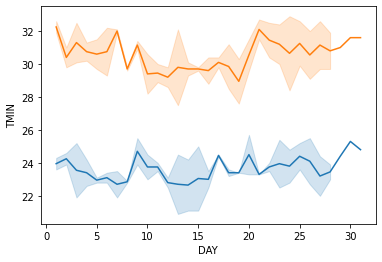

In [ ]:
## wind Speed Days (Line) 
# sns.lineplot(data=naia_df, x='DAY', y='TMEAN')
sns.lineplot(data=naia_df, x='DAY', y='TMIN')
sns.lineplot(data=naia_df, x='DAY', y='TMAX')

In [ ]:
## Students Answering Time (Scatter)

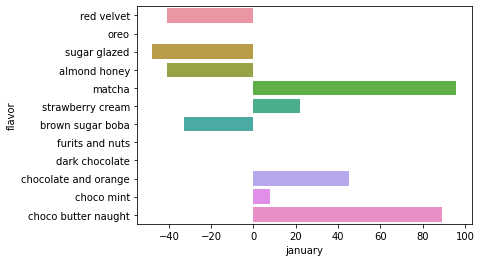

In [ ]:
## Bebang Cashflow (Waterfall)
sns.barplot(data=donut_sales_df, x='january', y='flavor')

In [ ]:
## Pokemon (Radar)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


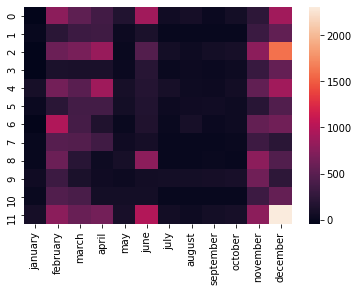

In [ ]:
sns.heatmap(data=donut_sales_df.drop(labels='flavor',axis=1))


In [ ]:
def stats_pokemon(poke_id):
  labels=np.array(['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
  stats=pokemon_df.loc[poke_id-1,labels].values

  angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
  # close the plot
  stats=np.concatenate((stats,[stats[0]]))
  angles=np.concatenate((angles,[angles[0]]))

  fig=plt.figure()
  ax = fig.add_subplot(111, polar=True)
  ax.plot(angles, stats, 'o-', linewidth=2)
  ax.fill(angles, stats, alpha=0.25)
  ax.set_thetagrids(angles * 180/np.pi, labels)
  ax.set_title([pokemon_df.loc[poke_id-1,"name"]])
  ax.grid(True)

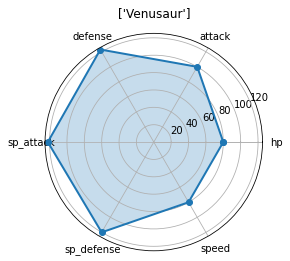

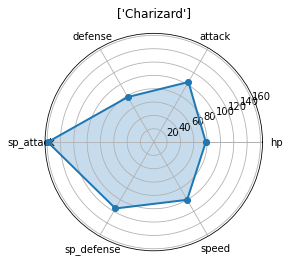

In [ ]:
stats_pokemon(3)
stats_pokemon(6)
